### 학습 내용
>SVD를 사용하여 흑백이미지 압축

* 이미지 : 행렬 혹은 벡터 데이터
    * 흑백 : 2D, 0~255 혹은 0~1
    * 컬러 : 2D, (R,G,B) 3개의 행렬

* Truncated SVD : U,s,VT = linalg.svd(A)
    * $A = U_rDV_r^T$(reduced svd)의 D를 truncate
    * A_trunc = U$[:,:t]$*s$[:t]$@VT$[:t,:]$

* 압축률 : t*(m+n+1)/(m*n) x 100 원래데이터의 몇 퍼센트를 사용해서 복원했는지.
    * 원본 흑백 복구 : U@linalg.diagsvd(s,m,n)@VT
        * 합 = m x m + n x n + min(m,n) : 원본(m x n)보다 더 많이 필요
    * 압축 : U$[:,:t]$*s$[:t]$@VT$[:t,:]$
        * 합 = t*(m+n+1)  : t가 작으면 m x n 보다 작아짐 / t < m*n/(m+n+1)

* 이미지 관련 라이브러리 설치 : pip install scikit-image


### code

In [10]:
import numpy as np
from scipy import linalg
from skimage import io as imgio
import matplotlib.pyplot as plt

In [15]:
img_mat = imgio.imread('image.jpeg',as_gray = True) # image를 흑백으로 읽어옴
shape = img_mat.shape

In [17]:
m = shape[0] 
n = shape[1]

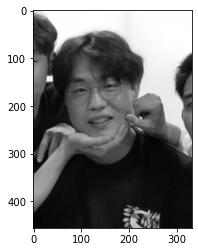

In [11]:
plt.imshow(img_mat,cmap='gray')

In [36]:
U, s, VT = linalg.svd(img_mat)
img_recon = U@linalg.diagsvd(s,m,n)@VT
t = 30
ratio = t*(m+n+1)/(m*n)*100
img_trunc = U[:,:t]*s[:t]@VT[:t,:]

5.211636017755231


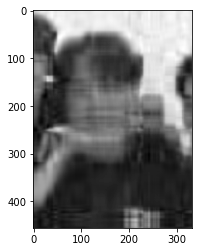

In [32]:
plt.imshow(img_trunc,cmap='gray')# t=10
print(ratio) # 원래데이터의 5%사용

10.423272035510463


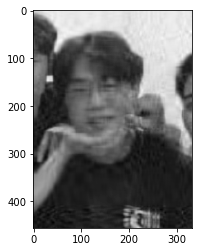

In [35]:
plt.imshow(img_trunc,cmap='gray')# t=20
print(ratio) # 원래데이터의 10%사용

15.634908053265695


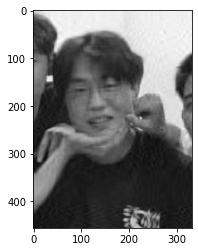

In [37]:
plt.imshow(img_trunc,cmap='gray')# t=30
print(ratio) # 원래데이터의 15%사용

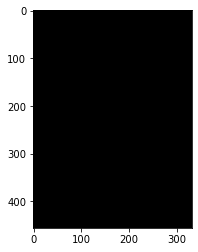

t : 0, 압축률 : 0.0 %


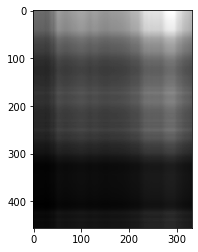

t : 1, 압축률 : 0.5211636017755231 %


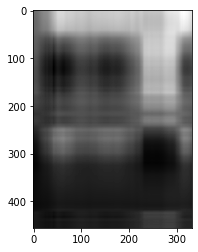

t : 2, 압축률 : 1.0423272035510462 %


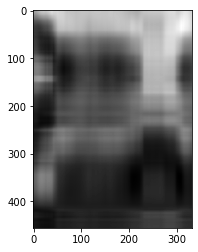

t : 3, 압축률 : 1.5634908053265693 %


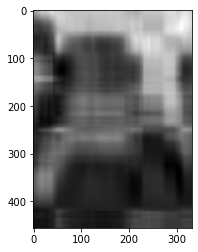

t : 4, 압축률 : 2.0846544071020925 %


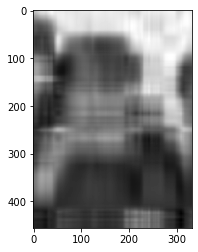

t : 5, 압축률 : 2.6058180088776157 %


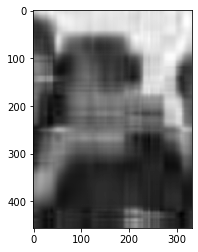

t : 6, 압축률 : 3.1269816106531385 %


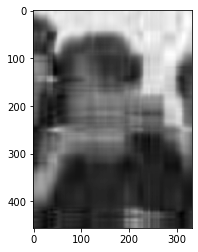

t : 7, 압축률 : 3.648145212428662 %


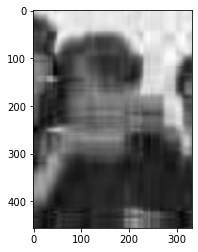

t : 8, 압축률 : 4.169308814204185 %


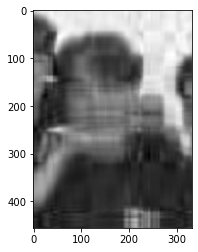

t : 9, 압축률 : 4.690472415979708 %


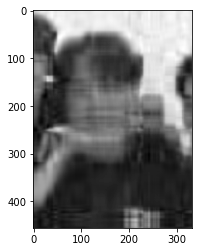

t : 10, 압축률 : 5.211636017755231 %


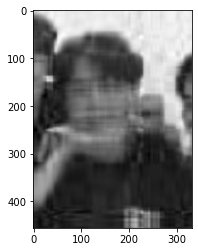

t : 11, 압축률 : 5.732799619530755 %


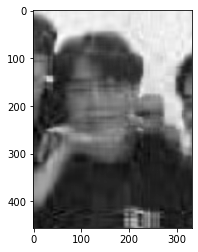

t : 12, 압축률 : 6.253963221306277 %


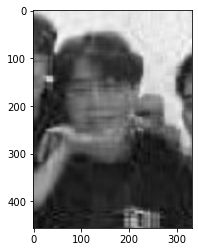

t : 13, 압축률 : 6.7751268230818 %


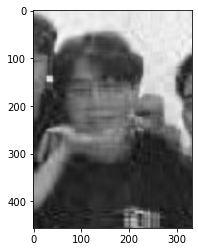

t : 14, 압축률 : 7.296290424857324 %


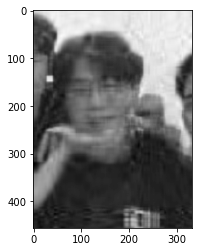

t : 15, 압축률 : 7.817454026632848 %


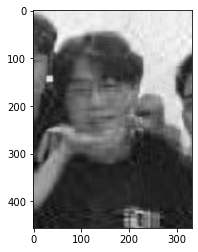

t : 16, 압축률 : 8.33861762840837 %


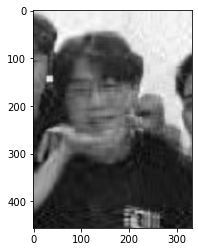

t : 17, 압축률 : 8.859781230183895 %


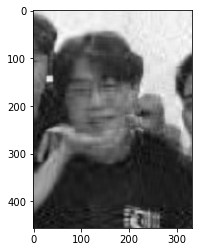

t : 18, 압축률 : 9.380944831959416 %


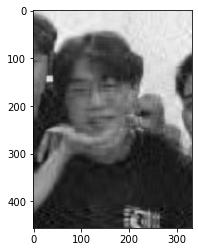

t : 19, 압축률 : 9.90210843373494 %


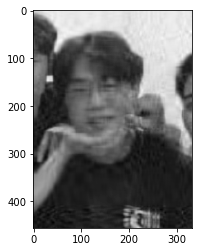

t : 20, 압축률 : 10.423272035510463 %


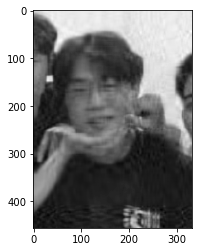

t : 21, 압축률 : 10.944435637285986 %


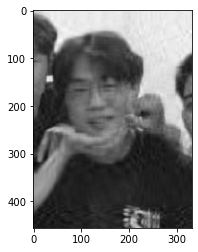

t : 22, 압축률 : 11.46559923906151 %


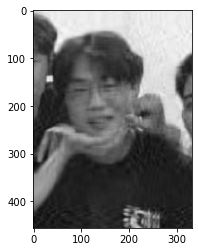

t : 23, 압축률 : 11.986762840837033 %


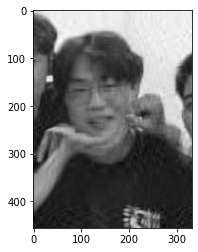

t : 24, 압축률 : 12.507926442612554 %


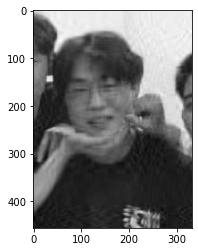

t : 25, 압축률 : 13.029090044388077 %


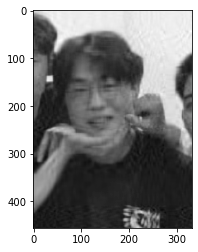

t : 26, 압축률 : 13.5502536461636 %


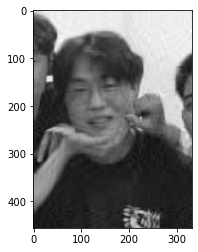

t : 27, 압축률 : 14.071417247939126 %


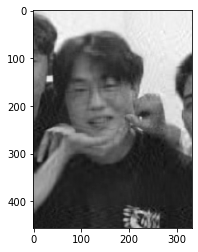

t : 28, 압축률 : 14.592580849714649 %


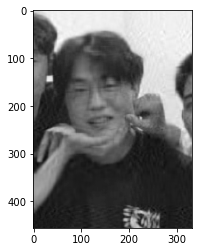

t : 29, 압축률 : 15.113744451490172 %


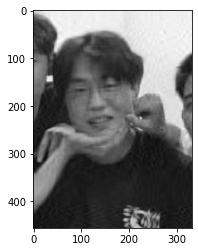

t : 30, 압축률 : 15.634908053265695 %


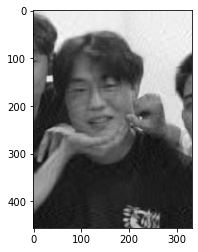

t : 31, 압축률 : 16.156071655041217 %


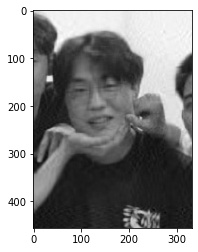

t : 32, 압축률 : 16.67723525681674 %


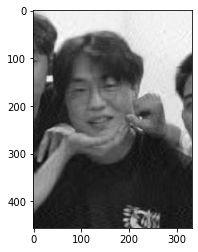

t : 33, 압축률 : 17.198398858592263 %


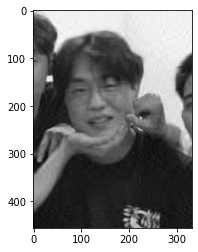

t : 34, 압축률 : 17.71956246036779 %


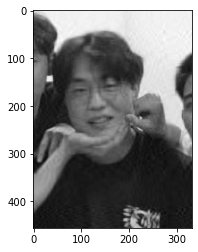

t : 35, 압축률 : 18.24072606214331 %


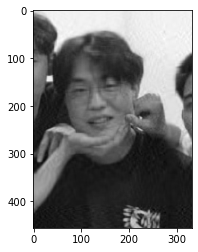

t : 36, 압축률 : 18.761889663918833 %


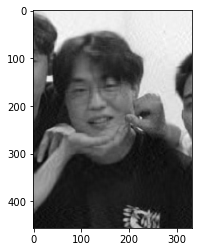

t : 37, 압축률 : 19.283053265694356 %


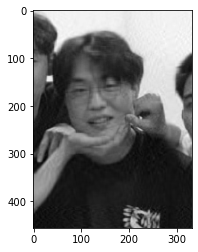

t : 38, 압축률 : 19.80421686746988 %


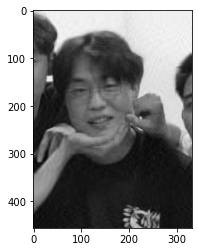

t : 39, 압축률 : 20.325380469245403 %


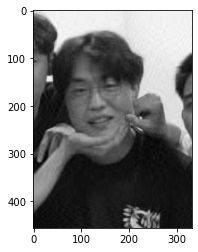

t : 40, 압축률 : 20.846544071020926 %


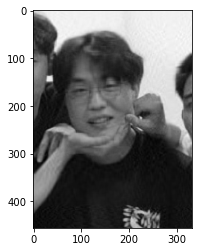

t : 41, 압축률 : 21.36770767279645 %


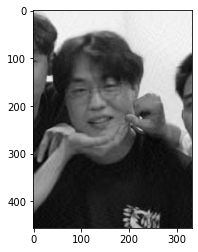

t : 42, 압축률 : 21.888871274571972 %


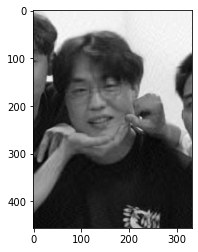

t : 43, 압축률 : 22.410034876347495 %


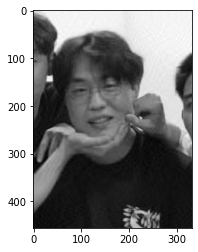

t : 44, 압축률 : 22.93119847812302 %


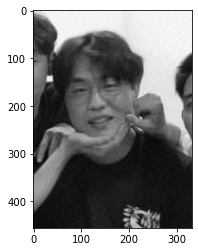

t : 45, 압축률 : 23.452362079898542 %


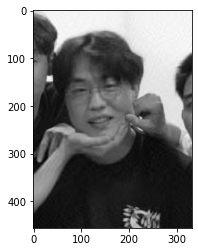

t : 46, 압축률 : 23.973525681674065 %


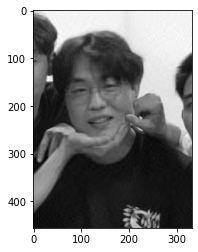

t : 47, 압축률 : 24.49468928344959 %


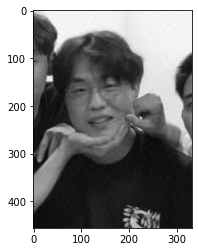

t : 48, 압축률 : 25.015852885225108 %


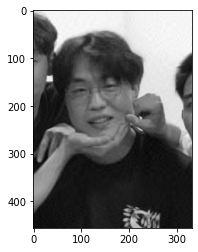

t : 49, 압축률 : 25.537016487000635 %


In [55]:
U, s, VT = linalg.svd(img_mat)
img_recon = U@linalg.diagsvd(s,m,n)@VT
for t in range(50) :
    ratio = t*(m+n+1)/(m*n)*100
    img_trunc = U[:,:t]*s[:t]@VT[:t,:]
    plt.imshow(img_trunc,cmap='gray')
    plt.show()
    print(f"t : {t}, 압축률 :",ratio,"%")


    
 # 25%부터 꽤 잘보인다.   
    